In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [15]:
#loading dataset
df = pd.read_csv('concrete_data.csv')
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [21]:
#finding duplicate
df.duplicated().sum()

np.int64(0)

In [20]:
df.drop_duplicates(inplace=True)

In [19]:
#checkng null values
df.isnull().any().sum()

np.int64(0)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1005 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1005 non-null   float64
 1   Blast Furnace Slag  1005 non-null   float64
 2   Fly Ash             1005 non-null   float64
 3   Water               1005 non-null   float64
 4   Superplasticizer    1005 non-null   float64
 5   Coarse Aggregate    1005 non-null   float64
 6   Fine Aggregate      1005 non-null   float64
 7   Age                 1005 non-null   int64  
 8   Strength            1005 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 78.5 KB


In [8]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000
mean,278.631343,72.043483,55.536318,182.075323,6.033234,974.376816,772.688259,45.856716,35.250378
std,104.344261,86.170807,64.207969,21.339334,5.919967,77.579667,80.340435,63.734692,16.284815
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,190.700000,0.000000,0.000000,166.600000,0.000000,932.000000,724.300000,7.000000,23.520000
50%,265.000000,20.000000,0.000000,185.700000,6.100000,968.000000,780.000000,28.000000,33.800000
75%,349.000000,142.500000,118.300000,192.900000,10.000000,1031.000000,822.200000,56.000000,44.870000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [ ]:
'''
inference
for column Cement,Blast Furnace Slag,Fly Ash and age mean is greater than meadin. data is right skewed
for column water,Superplasticizer and streght mean and median are almost equal it is normalised
for column Coarse Aggregate and Fine Aggregate	mean is lesser than median. so data is left skewed
'''

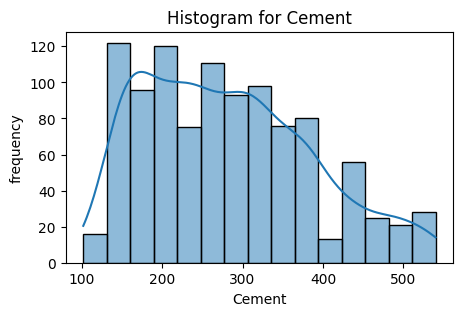

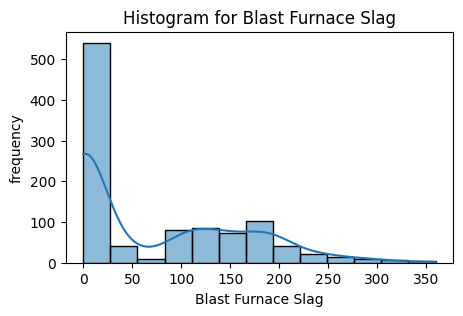

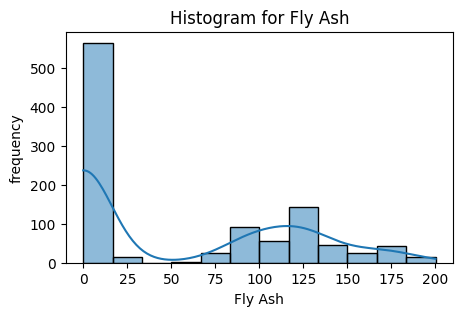

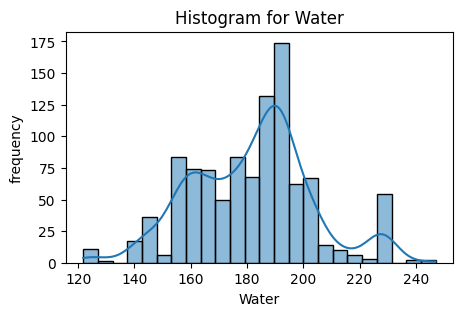

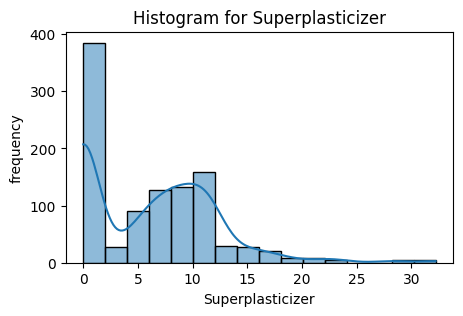

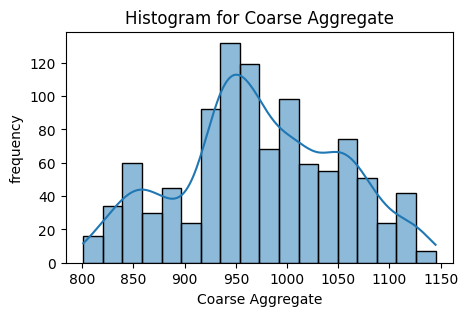

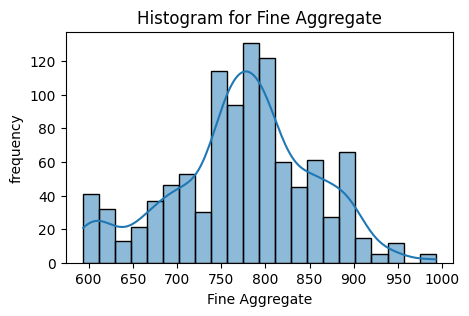

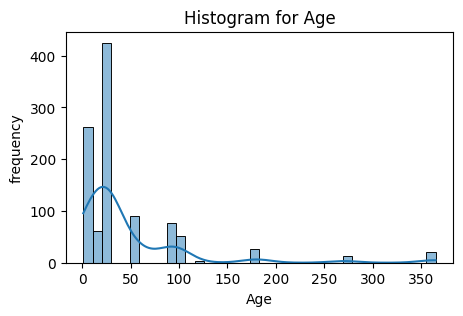

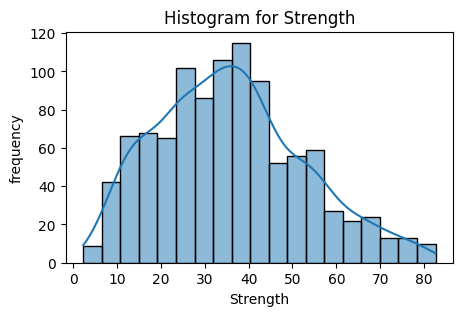

In [7]:
#histogram for numeric value
for col in df.select_dtypes(include= np.number):
  plt.figure(figsize = (5,3))
  sns.histplot(df[col],kde = True)
  plt.title(f'Histogram for {col}')
  plt.xlabel(col)
  plt.ylabel('frequency')
  plt.show()

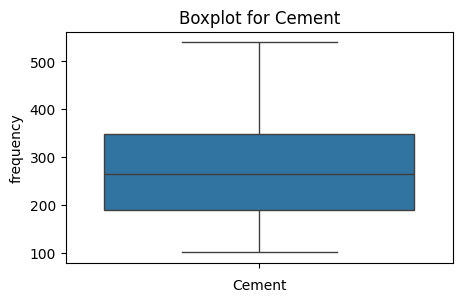

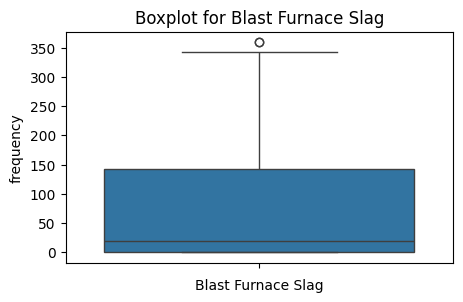

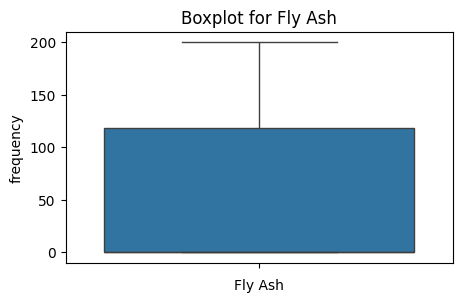

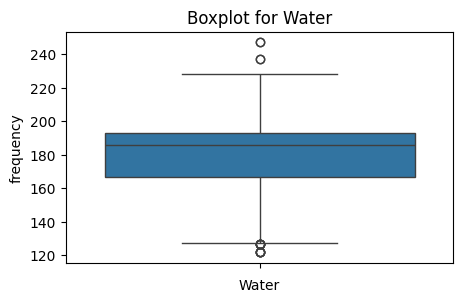

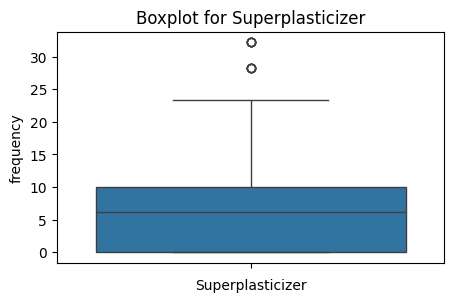

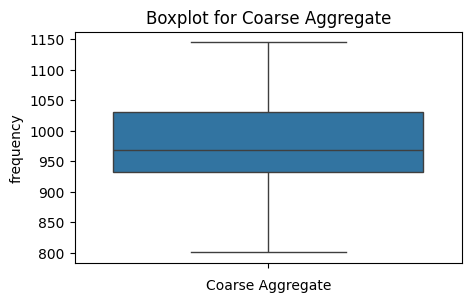

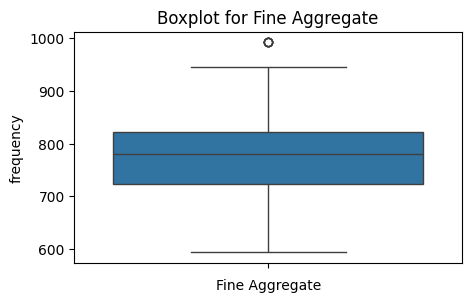

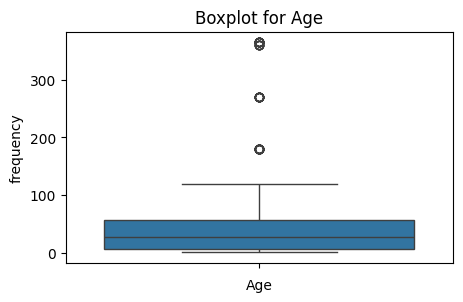

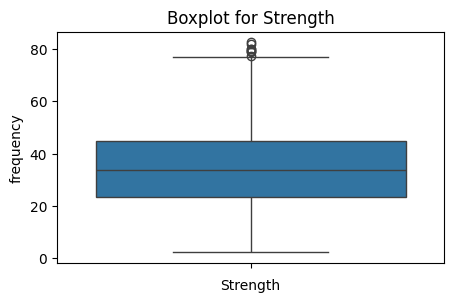

In [11]:
#boxplot for numeric value
for col in df.select_dtypes(include= np.number):
  plt.figure(figsize = (5,3))
  sns.boxplot(df[col])
  plt.title(f'Boxplot for {col}')
  plt.xlabel(col)
  plt.ylabel('frequency')
  plt.show()

In [ ]:
'''
inference
there are outlier in stregth,age,fineaggregate,superplasticizer,water,blast funance flag

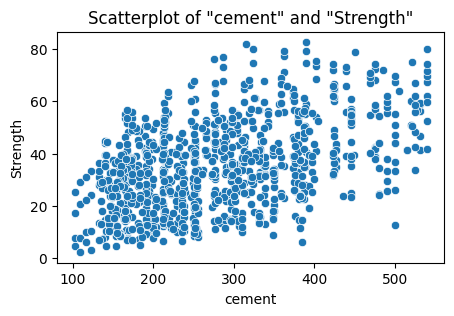

In [15]:
# Scatterplot (cement and stregnth)
plt.figure(figsize = (5, 3))
sns.scatterplot(x = 'Cement', y = 'Strength', data = df)
plt.title('Scatterplot of "cement" and "Strength"')
plt.xlabel('cement')
plt.ylabel('Strength')
plt.show()

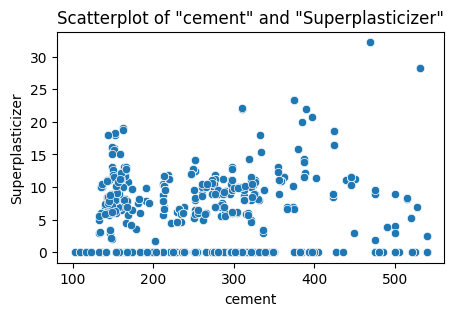

In [16]:
# Scatterplot (cement and Superplasticizer)
plt.figure(figsize = (5, 3))
sns.scatterplot(x = 'Cement', y = 'Superplasticizer', data = df)
plt.title('Scatterplot of "cement" and "Superplasticizer"')
plt.xlabel('cement')
plt.ylabel('Superplasticizer')
plt.show()

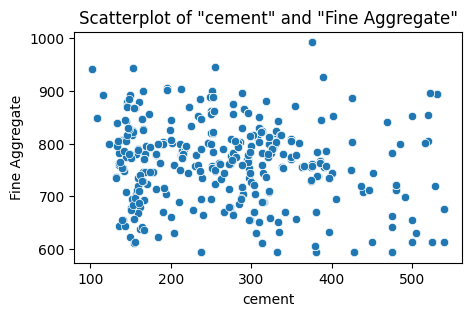

In [17]:

# Scatterplot (Cement and Fine Aggregate)
plt.figure(figsize = (5, 3))
sns.scatterplot(x = 'Cement', y = 'Fine Aggregate', data = df)
plt.title('Scatterplot of "cement" and "Fine Aggregate"')
plt.xlabel('cement')
plt.ylabel('Fine Aggregate')
plt.show()

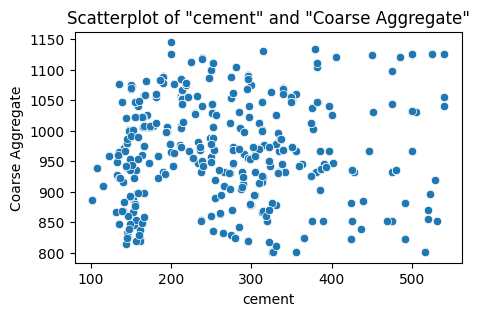

In [18]:
# Scatterplot (Cement and 	Coarse Aggregate)
plt.figure(figsize = (5, 3))
sns.scatterplot(x = 'Cement', y = 'Coarse Aggregate', data = df)
plt.title('Scatterplot of "cement" and "Coarse Aggregate"')
plt.xlabel('cement')
plt.ylabel('Coarse Aggregate')
plt.show()

<Figure size 500x300 with 0 Axes>

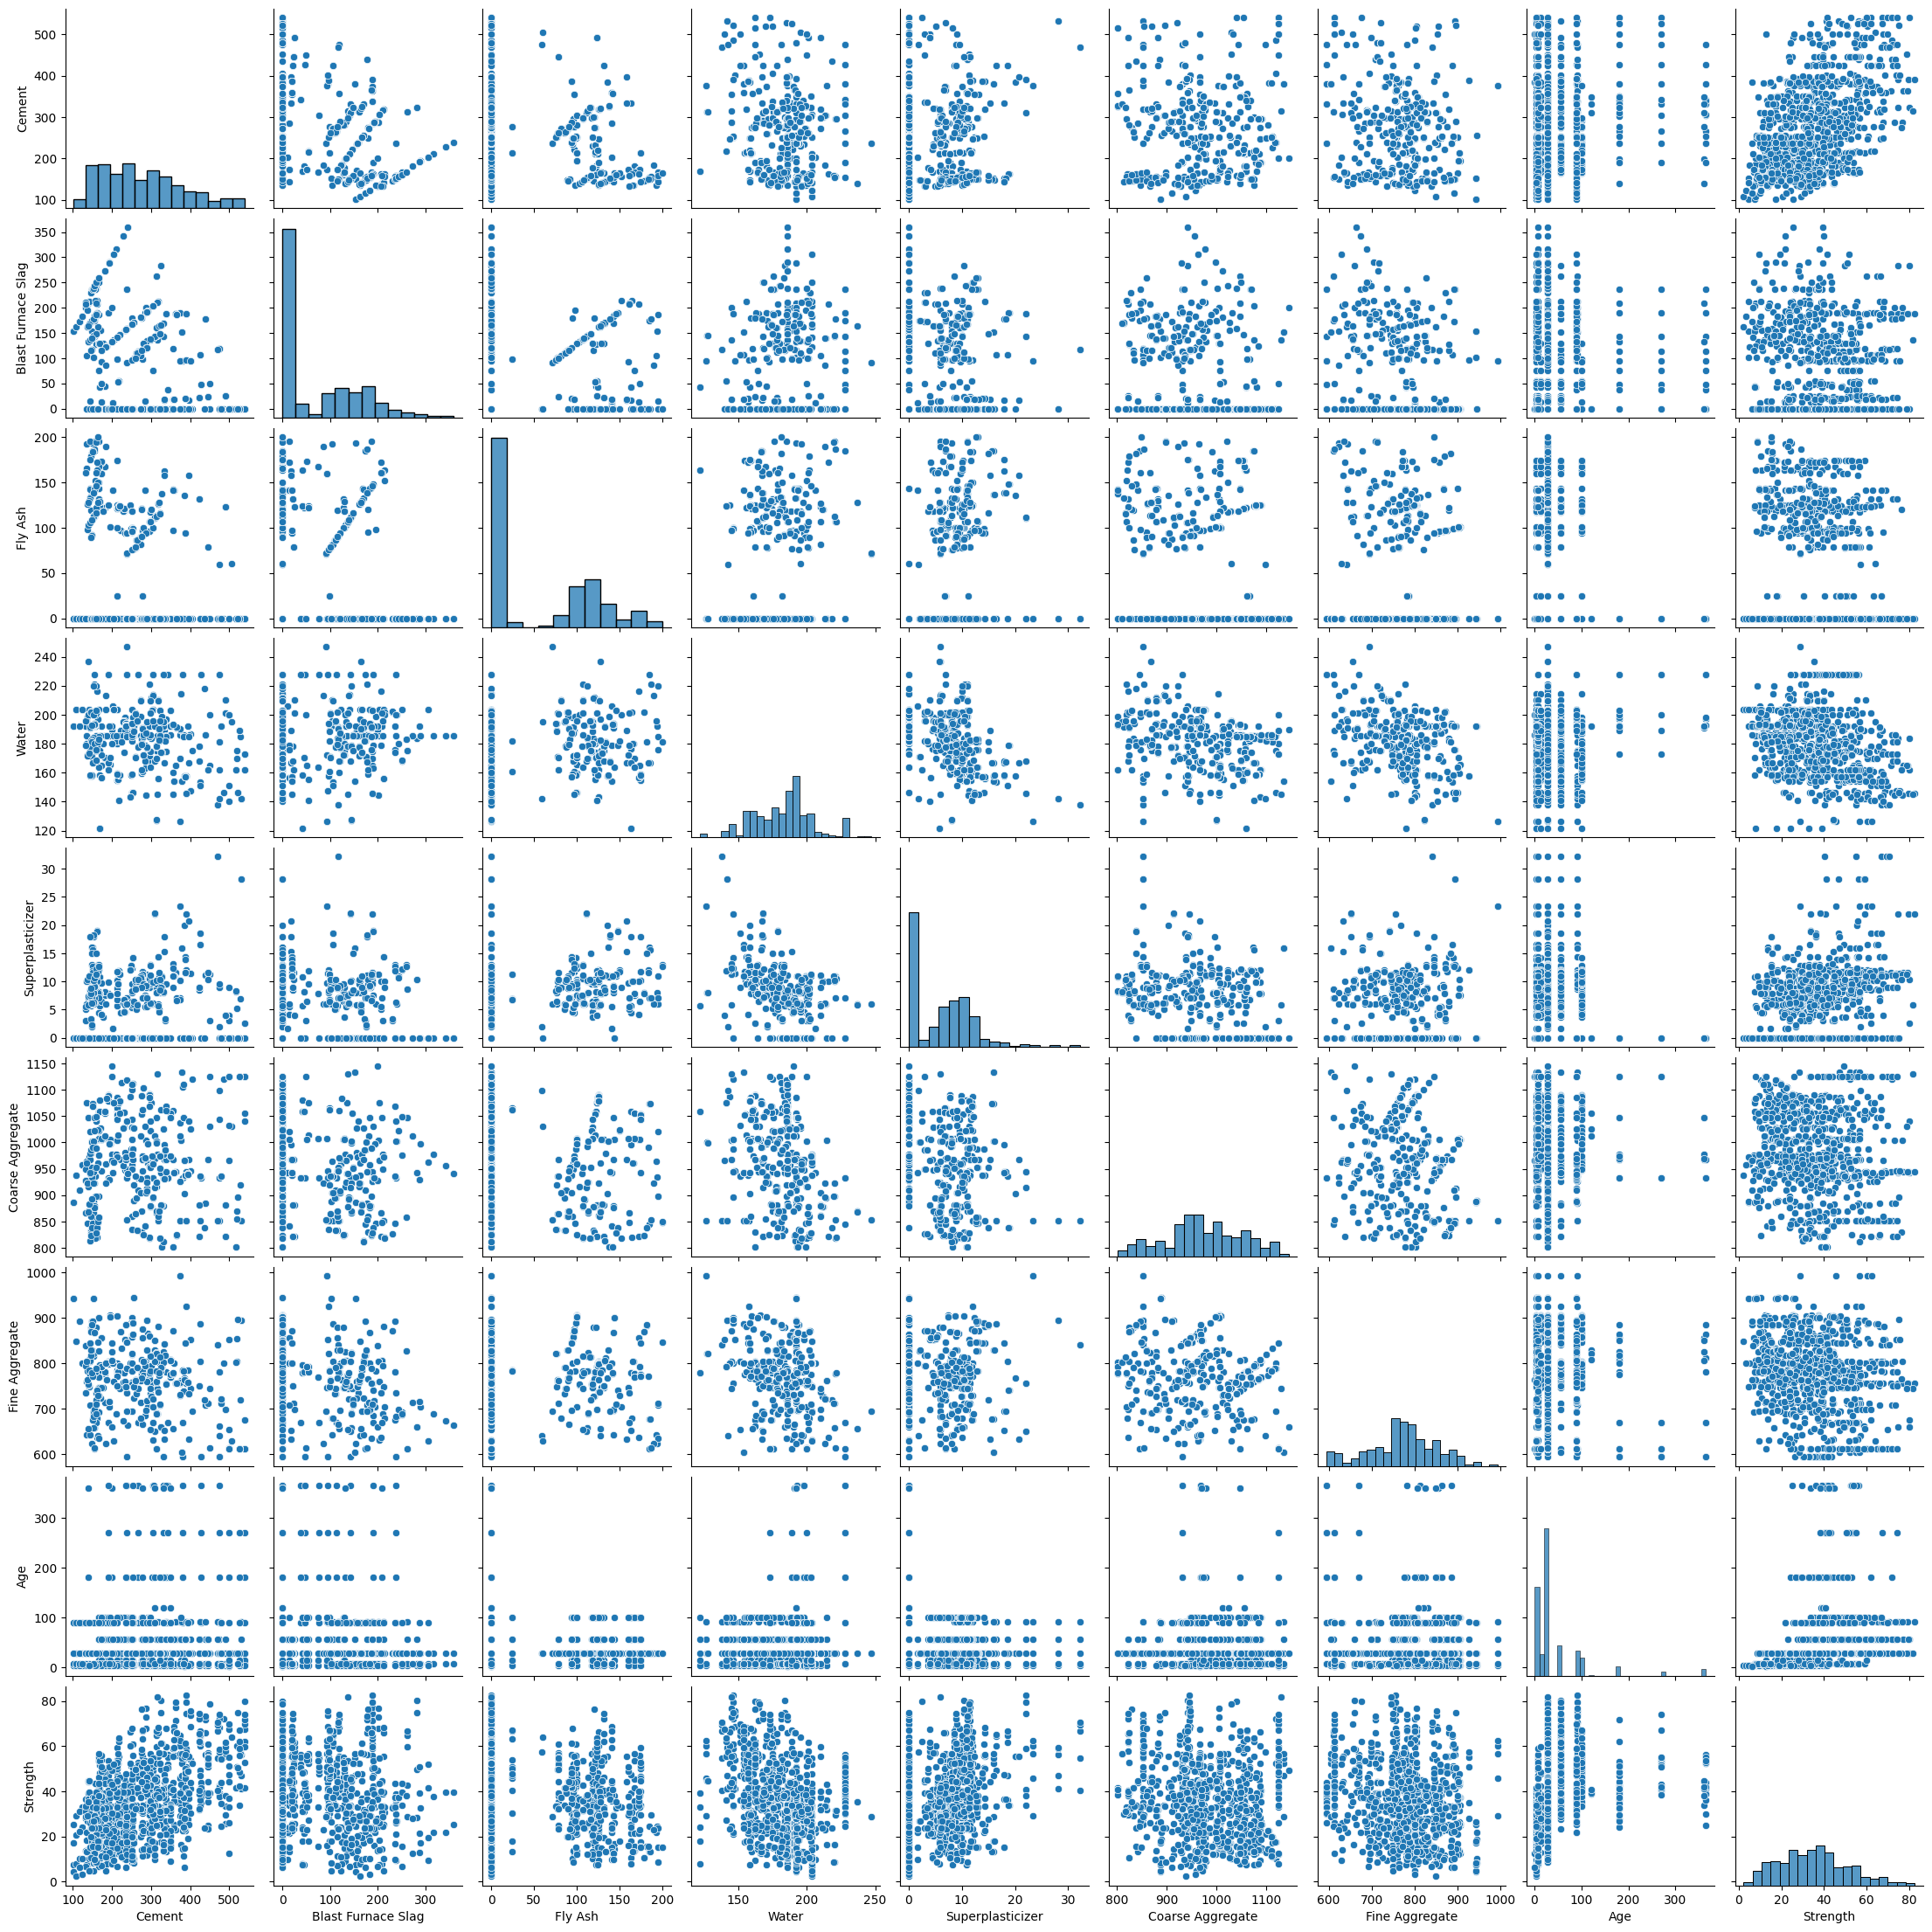

In [19]:
plt.figure(figsize = (5, 3))
sns.pairplot(df)

<Axes: >

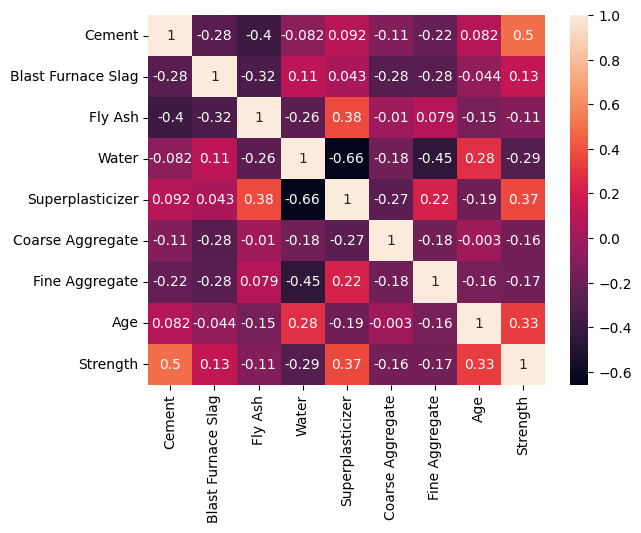

In [8]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
'''
cement and strenght are storongly positive correlated
Strength ,superplasticizer and age are positively correlated
fly ash and superplasticizer are strongly correlated
water and age, superplasticizer and fine aggregate are weakly correlated
'''

In [ ]:
'''
We are going to create 2 models ->
(1) Simple Linear Regression -> cement ~ strenght
(2) Multiple Linear Regression -> cement ~ Strength ,superplasticizer and fly ash
'''

In [48]:
# Seperating input and output features
X = df[['Cement']]
y = df['Strength']

# Performing train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

In [49]:
# Creating the model
from sklearn.linear_model import LinearRegression

# Initializing the model
model = LinearRegression()

# Fitting the model
model.fit(X_train, y_train)

LinearRegression()

In [50]:
# Taking predictions from the trained model on training and testing data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [51]:
# Model Evaluation
from sklearn.metrics import r2_score
print('Training R2 Score :', np.round(r2_score(y_train, y_train_pred), 2))
print('Testing R2 Score :', np.round(r2_score(y_test, y_test_pred), 2))

Training R2 Score : 0.27
Testing R2 Score : 0.15


'''
The difference between training and testing peformance is within 5% (which is acceptable)
But the performance is bad on training and testing data both (Underfitted)
'''

In [91]:
from sklearn.preprocessing import StandardScaler
# Step 3: Preprocessing - Drop missing values if necessary
df = df.dropna()  # Drop rows with missing values

# Step 4: Define features (X) and target (y)
X = df.drop('Strength', axis=1)  # Features
y = df['Strength']  # Target

# Step 5: Normalize the features (Standardization)
scaler = StandardScaler()

# Fit the scaler and transform the features
X_normalized = scaler.fit_transform(X)

In [85]:
# Step 6: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=5)


In [86]:
# Creating the model
from sklearn.linear_model import LinearRegression

# Initializing the model
model = LinearRegression()

# Fitting the model
model.fit(X_train, y_train)

LinearRegression()

In [87]:
# Taking predictions from the trained model on training and testing data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [88]:
# Model Evaluation
from sklearn.metrics import r2_score,mean_squared_error
print('Training R2 Score :', np.round(r2_score(y_train, y_train_pred), 2))
print('Testing R2 Score :', np.round(r2_score(y_test, y_test_pred), 2))

Training R2 Score : 0.63
Testing R2 Score : 0.55


In [ ]:
'''
The difference between training and testing peformance is within 5% (which is acceptable)
But the performance is improved on training and testing data both (Underfitted)
'''

In [89]:
from sklearn.metrics import r2_score,mean_squared_error
mse = mean_squared_error(y_test, y_test_pred)

print(f"Mean Squared Error: {mse}")

Mean Squared Error: 105.02227201246566


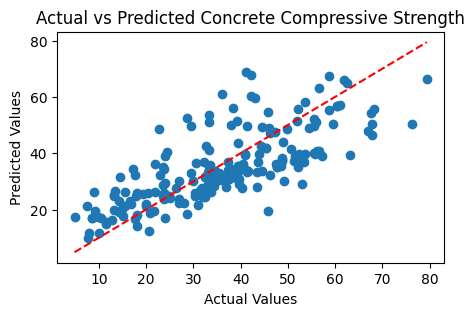

In [90]:
# Step 11: Visualize the actual vs predicted values (Optional)
plt.figure(figsize=(5,3))
plt.scatter(y_test, y_test_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Concrete Compressive Strength')
plt.show()

(2) Multiple Linear Regression -> cement ~ Strength ,superplasticizer and fly ash

In [97]:
# Seperating input and output features
X = df[['Fine Aggregate', 'Superplasticizer', 'Fly Ash']]
y = df['Cement']

# Performing train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

In [98]:
# Creating the model
from sklearn.linear_model import LinearRegression

# Initializing the model
model = LinearRegression()

# Fitting the model
model.fit(X_train, y_train)

LinearRegression()

In [100]:
# Taking predictions from the trained model on training and testing data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [101]:
# Model Evaluation
from sklearn.metrics import r2_score
print('Training R2 Score :', np.round(r2_score(y_train, y_train_pred), 2))
print('Testing R2 Score :', np.round(r2_score(y_test, y_test_pred), 2))

Training R2 Score : 0.3
Testing R2 Score : 0.23


In [102]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming the DataFrame 'df' is already loaded
# Seperating input and output features
X = df[['Fine Aggregate', 'Superplasticizer', 'Fly Ash']]
y = df['Cement']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler and transform the features X (normalize input features)
X_normalized = scaler.fit_transform(X)

# If you also want to normalize the target variable (Cement)
y_normalized = scaler.fit_transform(y.values.reshape(-1, 1))  # Reshape y to be a 2D array for scaling

# Convert X_normalized back to a DataFrame for better readability
X_normalized = pd.DataFrame(X_normalized, columns=X.columns)

# Print the normalized input features and target variable
print("Normalized Input Features (X):")
print(X_normalized.head())
print("\nNormalized Target Variable (y):")
print(y_normalized[:5])  # Printing the first 5 values of normalized target variable

Normalized Input Features (X):
   Fine Aggregate  Superplasticizer   Fly Ash
0       -1.217670         -0.620448 -0.847144
1       -1.217670         -0.620448 -0.847144
2       -2.240917         -1.039143 -0.847144
3       -2.240917         -1.039143 -0.847144
4        0.647884         -1.039143 -0.847144

Normalized Target Variable (y):
[[ 2.47791487]
 [ 2.47791487]
 [ 0.49142531]
 [ 0.49142531]
 [-0.79045879]]


In [107]:
# Step 6: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=5)


In [108]:
# Creating the model
from sklearn.linear_model import LinearRegression

# Initializing the model
model = LinearRegression()

# Fitting the model
model.fit(X_train, y_train)

LinearRegression()

In [109]:
# Taking predictions from the trained model on training and testing data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [110]:
# Model Evaluation
from sklearn.metrics import r2_score
print('Training R2 Score :', np.round(r2_score(y_train, y_train_pred), 2))
print('Testing R2 Score :', np.round(r2_score(y_test, y_test_pred), 2))

Training R2 Score : 0.3
Testing R2 Score : 0.23


In [ ]:
##no improvement

In [111]:
# Tranformation Example ->
df['log_Fine Aggregate'] = np.log(df['Fine Aggregate'])
df['exp_Fine Aggregate'] = np.exp(df['Fine Aggregate'])
df['sqr_Fine Aggregate'] = df['Fine Aggregate'] ** 2
df['cube_Fine Aggregate'] = df['Fine Aggregate'] ** 3
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength,log_Fine Aggregate,exp_Fine Aggregate,sqr_Fine Aggregate,cube_Fine Aggregate
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99,6.516193,3.828862e+293,456976.00,3.089158e+08
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89,6.516193,3.828862e+293,456976.00,3.089158e+08
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27,6.386879,9.352382e+257,352836.00,2.095846e+08
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05,6.386879,9.352382e+257,352836.00,2.095846e+08
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30,6.715989,inf,681450.25,5.625372e+08


**Model Evaluation:**

Calculate evaluation metrics for both Simple and Multiple Linear
Regression models:

Mean Squared Error (MSE)

Mean Absolute Error (MAE)

R-squared (R²)

Adjusted R-squared (Adjusted R²)

Compare the performance of both models and justify the results.



In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

# Assuming the DataFrame df is already loaded
# Separating input and output features for both models
X_simple = df[['Fine Aggregate']]  # Simple Linear Regression (one feature)
X_multiple = df[['Fine Aggregate', 'Superplasticizer', 'Fly Ash']]  # Multiple Linear Regression (multiple features)
y = df['Cement']  # Target variable

# Splitting the dataset into training and testing sets
X_train_simple, X_test_simple, y_train, y_test = train_test_split(X_simple, y, test_size=0.2, random_state=42)
X_train_multiple, X_test_multiple = train_test_split(X_multiple, test_size=0.2, random_state=42)

# Step 1: Simple Linear Regression Model
simple_model = LinearRegression()
simple_model.fit(X_train_simple, y_train)
y_pred_simple = simple_model.predict(X_test_simple)

# Step 2: Multiple Linear Regression Model
multiple_model = LinearRegression()
multiple_model.fit(X_train_multiple, y_train)
y_pred_multiple = multiple_model.predict(X_test_multiple)

# Step 3: Calculate Evaluation Metrics

# Mean Squared Error (MSE)
mse_simple = mean_squared_error(y_test, y_pred_simple)
mse_multiple = mean_squared_error(y_test, y_pred_multiple)

# Mean Absolute Error (MAE)
mae_simple = mean_absolute_error(y_test, y_pred_simple)
mae_multiple = mean_absolute_error(y_test, y_pred_multiple)

# R-squared (R²)
r2_simple = r2_score(y_test, y_pred_simple)
r2_multiple = r2_score(y_test, y_pred_multiple)

# Adjusted R-squared (Adjusted R²)
def adjusted_r2(X, y, model):
    n = X.shape[0]  # Number of data points
    p = X.shape[1]  # Number of features (predictors)
    r2 = model.score(X, y)  # R-squared from the model
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

adjusted_r2_simple = adjusted_r2(X_test_simple, y_test, simple_model)
adjusted_r2_multiple = adjusted_r2(X_test_multiple, y_test, multiple_model)

# Step 4: Display the results

print("Simple Linear Regression Metrics:")
print(f"Mean Squared Error (MSE): {mse_simple}")
print(f"Mean Absolute Error (MAE): {mae_simple}")
print(f"R-squared (R²): {r2_simple}")
print(f"Adjusted R-squared: {adjusted_r2_simple}")

print("\nMultiple Linear Regression Metrics:")
print(f"Mean Squared Error (MSE): {mse_multiple}")
print(f"Mean Absolute Error (MAE): {mae_multiple}")
print(f"R-squared (R²): {r2_multiple}")
print(f"Adjusted R-squared: {adjusted_r2_multiple}")

Simple Linear Regression Metrics:
Mean Squared Error (MSE): 10457.261872300869
Mean Absolute Error (MAE): 81.7964062264814
R-squared (R²): 0.06800573252972786
Adjusted R-squared: 0.06332234425098271

Multiple Linear Regression Metrics:
Mean Squared Error (MSE): 8490.365002098106
Mean Absolute Error (MAE): 70.37774078871603
R-squared (R²): 0.24330368625027066
Adjusted R-squared: 0.23178039213225443


**Residual Analysis:**

Perform residual analysis to validate the assumptions of Linear Regression:

Linearity
Homoscedasticity (constant variance)

Independence of errors

Normality of residuals


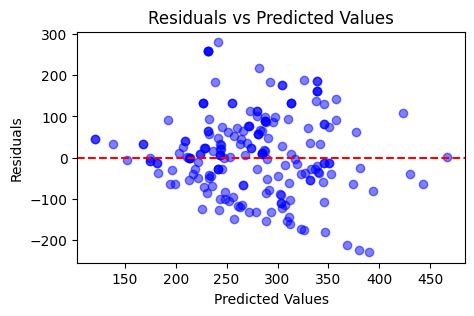

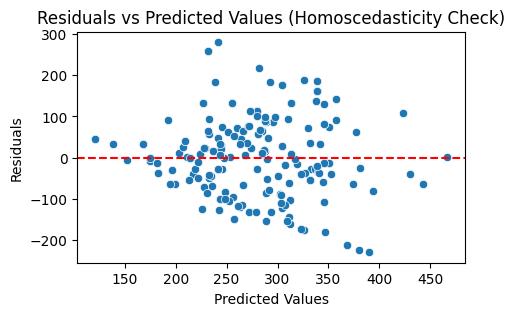

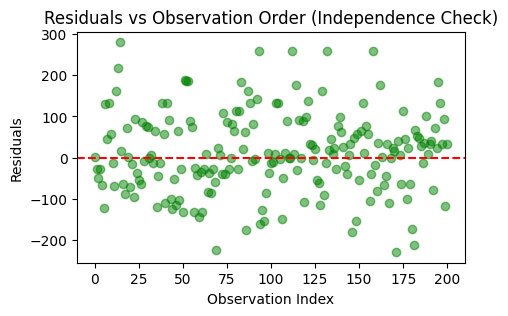

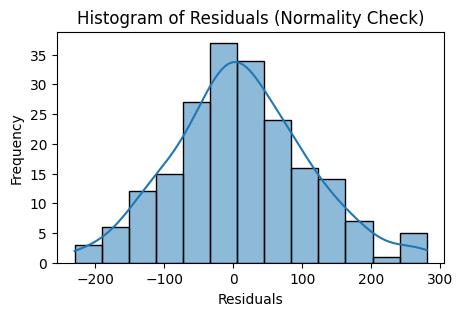

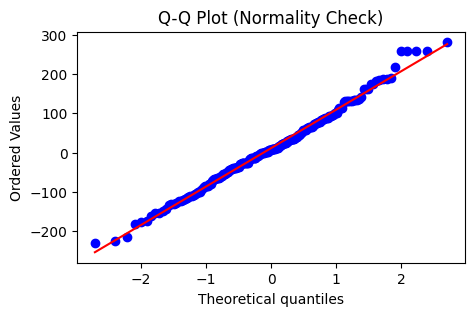

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Let's take the Multiple Linear Regression example for this analysis

# Step 1: Split the data into features (X) and target (y)
X = df[['Fine Aggregate', 'Superplasticizer', 'Fly Ash']]
y = df['Cement']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

# Step 2: Fit the model (Multiple Linear Regression)
model = LinearRegression()
model.fit(X_train, y_train)

# Step 3: Make predictions and calculate residuals
y_pred = model.predict(X_test)
residuals = y_test - y_pred

# Step 4: Plotting Residuals

# 1. Linearity: Plot residuals vs. predicted values
plt.figure(figsize=(5, 3))
plt.scatter(y_pred, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# 2. Homoscedasticity: Check if residuals have constant variance
plt.figure(figsize=(5, 3))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values (Homoscedasticity Check)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# 3. Independence of errors: Plot residuals vs. index (order of observations)
plt.figure(figsize=(5, 3))
plt.scatter(np.arange(len(residuals)), residuals, color='green', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs Observation Order (Independence Check)')
plt.xlabel('Observation Index')
plt.ylabel('Residuals')
plt.show()

# 4. Normality of residuals: Histogram and Q-Q plot
# Histogram of residuals
plt.figure(figsize=(5, 3))
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals (Normality Check)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Q-Q plot for normality
import scipy.stats as stats
plt.figure(figsize=(5, 3))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot (Normality Check)')
plt.show()

**Model Optimization:**

Identify and remove irrelevant or highly correlated predictors to improve the model's performance.

Assess the impact of feature selection on the R-squared and Adjusted R-squared values.


In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Assuming the DataFrame df is already loaded

# Step 1: Separating input and output features
X = df[['Fine Aggregate', 'Superplasticizer', 'Fly Ash', 'Cement']]  # Example features
y = df['Strength']  # Target variable

# Step 2: Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Fit the initial model (Multiple Linear Regression with all features)
model_all = LinearRegression()
model_all.fit(X_train, y_train)

# Make predictions
y_pred_all = model_all.predict(X_test)

# Evaluate the model
r2_all = r2_score(y_test, y_pred_all)

# Step 4: Check for multicollinearity using VIF
X_with_const = add_constant(X)  # Add constant term to the features
vif_data = pd.DataFrame()
vif_data["feature"] = X_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]

print("VIF values for each feature:")
print(vif_data)

# Step 5: Identify and remove highly correlated predictors
# We can drop features with high VIF (typically above 10)
# For example, let's assume 'Fly Ash' has a high VIF and we drop it:

X_optimized = X.drop(['Fly Ash'], axis=1)

# Step 6: Fit the optimized model (after removing a highly correlated feature)
X_train_opt, X_test_opt, y_train, y_test = train_test_split(X_optimized, y, test_size=0.2, random_state=42)

model_opt = LinearRegression()
model_opt.fit(X_train_opt, y_train)

# Make predictions
y_pred_opt = model_opt.predict(X_test_opt)

# Evaluate the optimized model
r2_opt = r2_score(y_test, y_pred_opt)

# Step 7: Assess impact on R-squared and Adjusted R-squared
def adjusted_r2(X, y, model):
    n = X.shape[0]  # Number of data points
    p = X.shape[1]  # Number of features
    r2 = model.score(X, y)  # R-squared from the model
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

adjusted_r2_all = adjusted_r2(X_test, y_test, model_all)
adjusted_r2_opt = adjusted_r2(X_test_opt, y_test, model_opt)

# Print results
print("\nResults before optimization (using all features):")
print(f"R-squared: {r2_all}")
print(f"Adjusted R-squared: {adjusted_r2_all}")

print("\nResults after optimization (removing high VIF feature):")
print(f"R-squared: {r2_opt}")
print(f"Adjusted R-squared: {adjusted_r2_opt}")

VIF values for each feature:
            feature         VIF
0             const  134.278577
1    Fine Aggregate    1.144133
2  Superplasticizer    1.394131
3           Fly Ash    1.544994
4            Cement    1.381135

Results before optimization (using all features):
R-squared: 0.30487054702222594
Adjusted R-squared: 0.29068423165533264

Results after optimization (removing high VIF feature):
R-squared: 0.3016444104978101
Adjusted R-squared: 0.29100955380488325
